In [1]:
# Common imports
import pandas as pd
import numpy as np

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

### Exercise 9

Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

**Exercise 9-1:** Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing)

In [2]:
from sklearn.datasets import fetch_mldata

# Load the MNIST dataset
mnist = fetch_mldata("MNIST original")

# Split the MNIST dataset into a training set and a testset
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]
X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

**Exercise 9-2:** Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [4]:
import time

t0 = time.time()
rf_clf.fit(X_train, y_train)
t1 = time.time()

In [5]:
print("Training time: {}".format(t1 - t0))

Training time: 4.750399827957153


In [6]:
from sklearn.metrics import accuracy_score

y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455

**Exercise 9-3:** use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

**Exercise 9-4:** Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?

In [8]:
rf_clf_2 = RandomForestClassifier(random_state=42)
t0 = time.time()
rf_clf_2.fit(X_train_reduced, y_train)
t1 = time.time()

In [9]:
print("Training time: {}".format(t1 - t0))

Training time: 11.199048042297363


> Training is actually more than twice slower now. Dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm.

**Exericse 9-5:** Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [10]:
X_test_reduced = pca.transform(X_test)

y_pred = rf_clf_2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8908

> It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful info in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance.

**Exercise 9-6:** See if it helps when using softmax regression

In [11]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                             random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

In [12]:
print("Training time: {}".format(t1 - t0))

Training time: 16.16476321220398


In [13]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9252

> Softmax regression takes much longer to train on this dataset than the random forest clf, plus it performs worse on the test set.

Use PCA:

In [14]:
log_clf_2 = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                               random_state=42)
t0 = time.time()
log_clf_2.fit(X_train_reduced, y_train)
t1 = time.time()

In [15]:
print("Training time: {}".format(t1 - t0))

Training time: 6.9344542026519775


> Reducing dimensionality led to speedup.

In [16]:
y_pred = log_clf_2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9198

> A very slight drop in performance, which might be a reasonalbe price to pay for time speedup, depending on the application.

So there u have it: PCA can give u a great speedup, but not always!

### Exercise 10

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations

**Exercise 10-1:** Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class.

In [17]:
# Load MNIST dataset
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

Dimensionality reduction on the full 60000 images takes a very long time, so only do this on a random subset of 10000 images:

In [18]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist.data[idx]
y = mnist.target[idx]

Use **t-SNE** to reduce dimensionality down to 2D so we can plot the dataset:

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

Use Matplotlib's `scatter()` func to plot a scatterplot, using a different color for each digit:

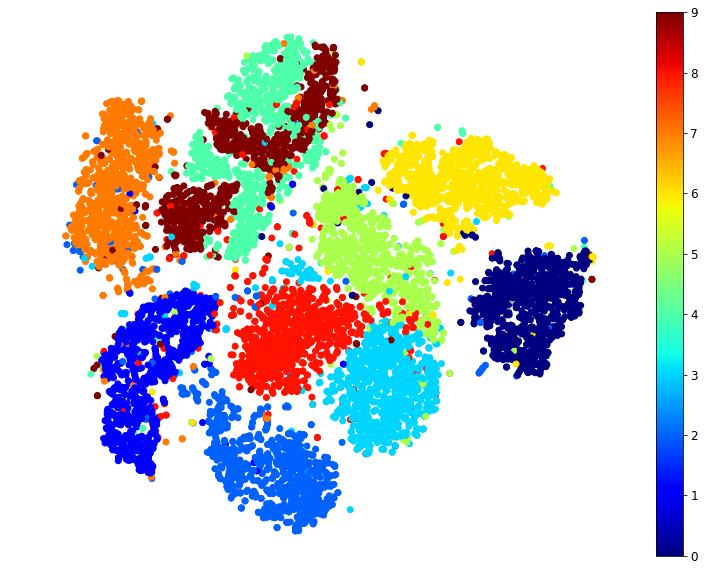

In [20]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis("off")
plt.colorbar()
plt.show()

> This plot tells us which numbers are easily distinguish from the others (e.g., 0s, 6s, and most 8s are rather well separated clusters), and it also tells us which number are often hard to distinguish (e.g., 4s and 9s, 5s and 3s, and so on).

Focus on digits 3 and 5, which seem to overlap a lot:

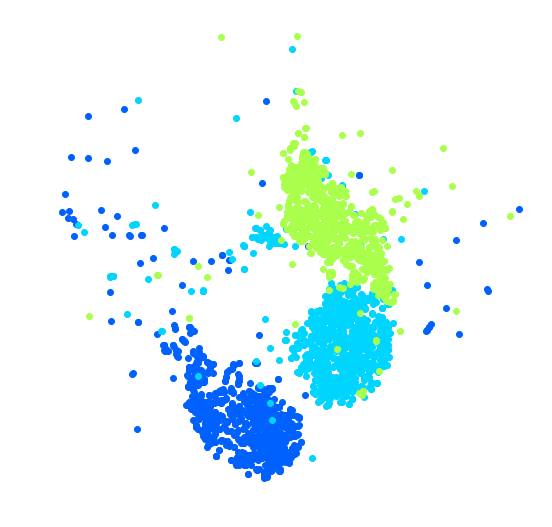

In [21]:
plt.figure(figsize=(9, 9))
cmap = matplotlib.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1],
                c=cmap(digit/9))
plt.axis("off")
plt.show()

See if we can produce a nicer image by running t-SNE on these 3 digits:

In [22]:
idx = (y == 2) | (y == 3) | (y == 5)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

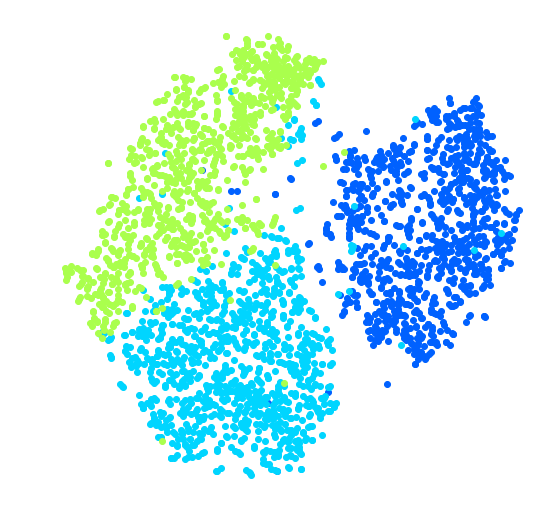

In [23]:
plt.figure(figsize=(9, 9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))
plt.axis("off")
plt.show()

> Much better! Now the clusters have far less overlap. But some 3s are all over the place. Plus, there are two distinct clusters of 2s, and also two distinct clusters of 5s. It would be nice if we could visualize a few digits from each cluster, to understand why this is the case.

**Exercise 10-2:** Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits.